In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import pickle
import seaborn as sns
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


ModuleNotFoundError: No module named 'seaborn'

In [ ]:
df = pd.read_csv("phishing_site_urls.csv")

In [ ]:
df.head()
df.tail()

,URL,Label
549841,cam.ac.uk,good
549842,over-blog-kiwi.com,good
549843,merriam-webster.com,good
549844,bp3.blogger.com,good
549845,kinja.com,good


In [ ]:
df.dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549846 entries, 0 to 549845
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   URL     549846 non-null  object
 1   Label   549846 non-null  object
dtypes: object(2)
memory usage: 8.4+ MB


In [ ]:
df.count
df.isnull().sum()

URL      0
Label    0
dtype: int64

In [ ]:
label_counts = pd.DataFrame(df.Label.value_counts())

NameError: name 'pd' is not defined

In [ ]:
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Label'>

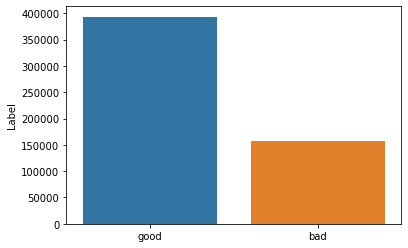

In [ ]:
sns.barplot(label_counts.index,label_counts.Label)

In [ ]:
wordnet = WordNetLemmatizer()

In [ ]:
X = df.iloc[:,:-1]


In [ ]:
X

,URL
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....
3,mail.printakid.com/www.online.americanexpress....
4,thewhiskeydregs.com/wp-content/themes/widescre...
...,...
549841,cam.ac.uk
549842,over-blog-kiwi.com
549843,merriam-webster.com
549844,bp3.blogger.com


In [ ]:
Y = df.iloc[:,-1]
Y

0          bad
1          bad
2          bad
3          bad
4          bad
          ... 
549841    good
549842    good
549843    good
549844    good
549845    good
Name: Label, Length: 549846, dtype: object

In [ ]:
import re

In [ ]:
corpus = []

In [ ]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')

In [ ]:
X.URL[322998]

'epublishasia.com/'

In [ ]:
df['X'] = df.URL.map(lambda t: tokenizer.tokenize(t))

In [ ]:
display(X.iloc[539325])

URL    devinkellerart.com/g7cberv
Name: 539325, dtype: object

In [ ]:
ps = PorterStemmer()
df['text_stemmed'] = df['X'].map(lambda l: [ps.stem(word) for word in l])

In [ ]:
df.sample(5)

,URL,Label,X,text_stemmed
106461,irprpro.com/wp-admin/css/new,bad,"[irprpro, com, wp, admin, css, new]","[irprpro, com, wp, admin, css, new]"
289782,beauregardsfamily.com/00ALL_NAMES.htm,good,"[beauregardsfamily, com, ALL, NAMES, htm]","[beauregardsfamili, com, all, name, htm]"
119063,savingfaithchurch.org/wp-content/plugins/updat...,bad,"[savingfaithchurch, org, wp, content, plugins,...","[savingfaithchurch, org, wp, content, plugin, ..."
262075,worldfilm.about.com/cs/spanishfilms/fr/21grams...,good,"[worldfilm, about, com, cs, spanishfilms, fr, ...","[worldfilm, about, com, cs, spanishfilm, fr, g..."
95118,www.gmks.com/MAGIC/Analyst.html,good,"[www, gmks, com, MAGIC, Analyst, html]","[www, gmk, com, magic, analyst, html]"


In [ ]:
df['text_join'] = df['text_stemmed'].map(lambda l: ' '.join(l))

In [ ]:
df

,URL,Label,X,text_stemmed,text_join
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad,"[nobell, it, ffb, d, dca, cce, f, login, SkyPe...","[nobel, it, ffb, d, dca, cce, f, login, skype,...",nobel it ffb d dca cce f login skype com en cg...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad,"[www, dghjdgf, com, paypal, co, uk, cycgi, bin...","[www, dghjdgf, com, paypal, co, uk, cycgi, bin...",www dghjdgf com paypal co uk cycgi bin webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad,"[serviciosbys, com, paypal, cgi, bin, get, int...","[serviciosbi, com, paypal, cgi, bin, get, into...",serviciosbi com paypal cgi bin get into herf s...
3,mail.printakid.com/www.online.americanexpress....,bad,"[mail, printakid, com, www, online, americanex...","[mail, printakid, com, www, onlin, americanexp...",mail printakid com www onlin americanexpress c...
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad,"[thewhiskeydregs, com, wp, content, themes, wi...","[thewhiskeydreg, com, wp, content, theme, wide...",thewhiskeydreg com wp content theme widescreen...
...,...,...,...,...,...
549841,cam.ac.uk,good,"[cam, ac, uk]","[cam, ac, uk]",cam ac uk
549842,over-blog-kiwi.com,good,"[over, blog, kiwi, com]","[over, blog, kiwi, com]",over blog kiwi com
549843,merriam-webster.com,good,"[merriam, webster, com]","[merriam, webster, com]",merriam webster com
549844,bp3.blogger.com,good,"[bp, blogger, com]","[bp, blogger, com]",bp blogger com


In [ ]:
browser = webdriver.Chrome(executable_path =r"C:\Users\hp\Downloads\chromedriver_win32\chromedriver")

NameError: name 'webdriver' is not defined

In [ ]:
bad_sites = df[df.Label == 'bad']
good_sites = df[df.Label == 'good']

In [ ]:
tf = TfidfVectorizer()

In [ ]:
feature = tf.fit_transform(df.text_join)

In [ ]:
feature[:5].toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(feature,df.Label)

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr.score(x_test,y_test)

0.9591814465088534

In [ ]:
sv = LinearSVC()

In [ ]:
sv.fit(x_train,y_train)

LinearSVC()

In [ ]:
sv.score(x_test,y_test)

0.9799726469860761

In [ ]:
print('Training Accuracy :',sv.score(x_train,y_train))
print('Testing Acccuracy :',sv.score(x_test,y_test))

       


Training Accuracy : 0.9978927407464887
Testing Acccuracy : 0.9799726469860761


In [ ]:
print(classification_report(sv.predict(x_test),y_test,target_names = ['Bad','Good']))

              precision    recall  f1-score   support

         Bad       0.95      0.97      0.96     38277
        Good       0.99      0.98      0.99     99185

    accuracy                           0.98    137462
   macro avg       0.97      0.98      0.98    137462
weighted avg       0.98      0.98      0.98    137462



In [ ]:
cf_mx = pd.DataFrame(confusion_matrix(sv.predict(x_test),y_test),columns = ['Predicted:Bad','Predicted:Good'],index =['Actual:Bad','Actual:Good'])

<AxesSubplot:>

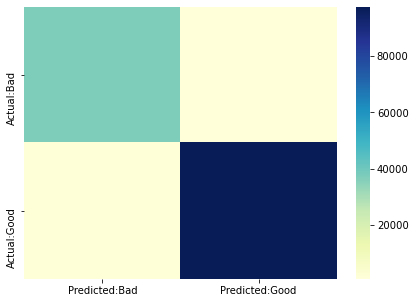

In [ ]:
plt.figure(figsize =(7,5))
sns.heatmap(cf_mx,cmap='YlGnBu')

In [ ]:
pipeline_sv = make_pipeline(TfidfVectorizer(tokenizer = RegexpTokenizer(r'[A-Za-z]+').tokenize,stop_words = 'english'),LinearSVC())

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(df.URL,df.Label)

In [ ]:
pipeline_sv.fit(x_train,y_train)

Pipeline(steps=[('tfidfvectorizer',
                 TfidfVectorizer(stop_words='english',
                                 tokenizer=<bound method RegexpTokenizer.tokenize of RegexpTokenizer(pattern='[A-Za-z]+', gaps=False, discard_empty=True, flags=re.UNICODE|re.MULTILINE|re.DOTALL)>)),
                ('linearsvc', LinearSVC())])

In [ ]:
pipeline_sv.score(x_test,y_test)

0.9809183628930177

In [ ]:
print('Training Accuracy :',pipeline_sv.score(x_train,y_train))
print('Testing Acccuracy :',pipeline_sv.score(x_test,y_test))

Training Accuracy : 0.9981982812136261
Testing Acccuracy : 0.9809183628930177


In [ ]:
cf_mx = pd.DataFrame(confusion_matrix(pipeline_sv.predict(x_test),y_test),columns = ['Predicted:Bad','Predicted:Good'],index =['Actual:Bad','Actual:Good'])

In [ ]:
print(classification_report(pipeline_sv.predict(x_test),y_test,target_names = ['Bad','Good']))

              precision    recall  f1-score   support

         Bad       0.95      0.98      0.97     38046
        Good       0.99      0.98      0.99     99416

    accuracy                           0.98    137462
   macro avg       0.97      0.98      0.98    137462
weighted avg       0.98      0.98      0.98    137462



<AxesSubplot:>

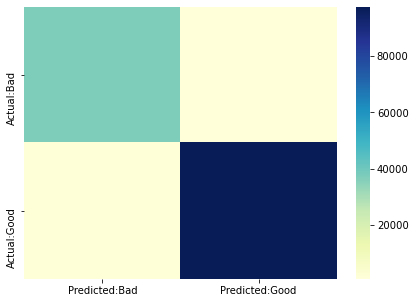

In [ ]:
plt.figure(figsize =(7,5))
sns.heatmap(cf_mx,cmap='YlGnBu')

In [ ]:
pickle.dump(pipeline_sv,open('malicious.pkl','wb'))

In [ ]:
loaded_model = pickle.load(open('malicious.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.9809183628930177


In [ ]:
predict_bad = ['nobell.it/70ffb52d079109dca5664cce6f317373782/login.SkyPe.com/en/cgi-bin/verification/login/70ffb52d079109dca5664cce6f317373/index.php?cmd=_profile-ach&outdated_page_tmpl=p/gen/failed-to-load&nav=0.5.1&login_access=1322408526']

In [ ]:
predict_good = ['epublishasia.com/']

In [ ]:
loaded_model = pickle.load(open('malicious.pkl','rb'))
result = loaded_model.predict(predict_bad)
print(result)

['bad']


In [ ]:
loaded_model = pickle.load(open('malicious.pkl','rb'))
result = loaded_model.predict(predict_good)
print(result)

NameError: name 'predict_good' is not defined

,URL
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....
3,mail.printakid.com/www.online.americanexpress....
4,thewhiskeydregs.com/wp-content/themes/widescre...
...,...
549841,cam.ac.uk
549842,over-blog-kiwi.com
549843,merriam-webster.com
549844,bp3.blogger.com
